# Problem Statement

The Advertising dataset captures sales revenue generated with respect to advertisement spends 
across multiple channels like radio, tv, and newspaper

### Objectives :

Build a linear regression model to:
• Interpret the coefficients of the model
• Make predictions
• Find and analyze model residuals
• Evaluate model efficiency using RMSE and R-Square values


In [2]:
# importing useful libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
df=pd.read_csv('Advertising.csv')
df.head(15)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [3]:
df.shape

(200, 5)

In [9]:
df.drop(['Unnamed: 0'],axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
df.shape

(200, 5)

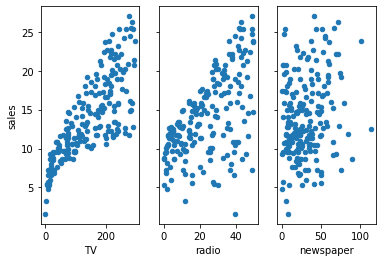

In [12]:
fig,axs=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0])
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [13]:
feature_col=['TV']
x=df[feature_col]
y=df.sales

In [14]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [15]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127694
[0.04753664]


In [16]:
# now we predict first roughly,for example we say for a new prduct tv sales market spends 50
# so equation we get is 7.032593549127694+0.04753664*50
# lets put this into practical


In [18]:
x_new=pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [19]:
lm.predict(x_new)

array([9.40942557])

In [26]:
# making predictions for largest and smallest values of x
X_new=pd.DataFrame({'TV':[df.TV.min(),df.TV.max]})
X_new.head()


,TV
0,0.7
1,<bound method Series.max of 0 230.1\n1 ...


In [32]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales ~ TV',data=df).fit()

In [33]:
lm.conf_int()# confidence interval

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [34]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [35]:
# above the p value of tv is far less than 0.05,hence there is relationship between tv ads and sales

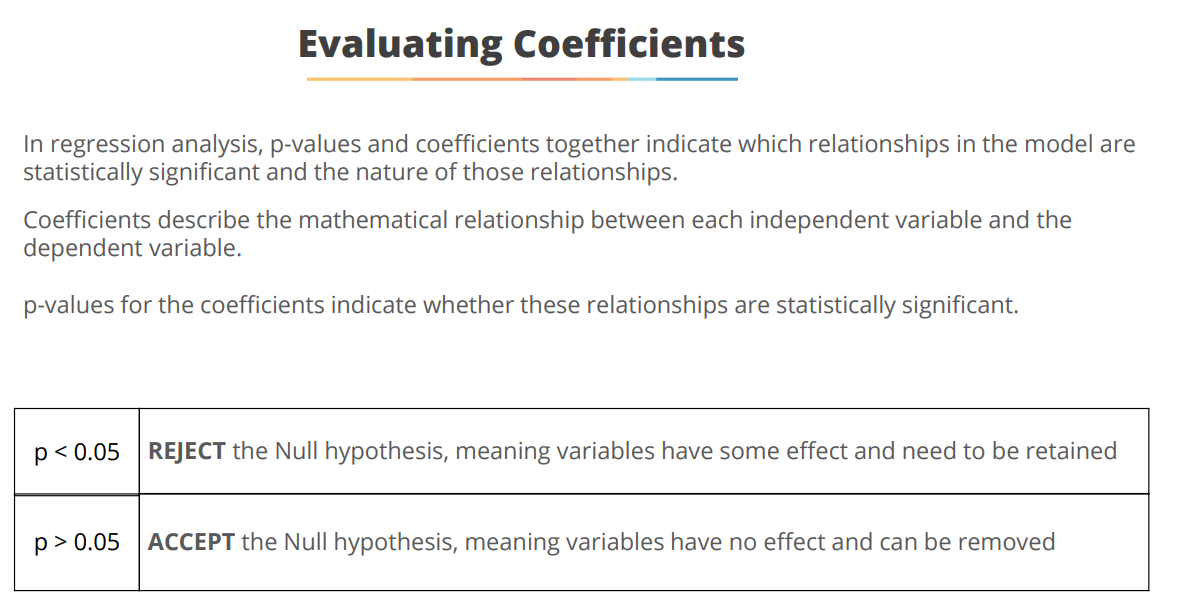

 ### now for accuracy we have multiple metrics

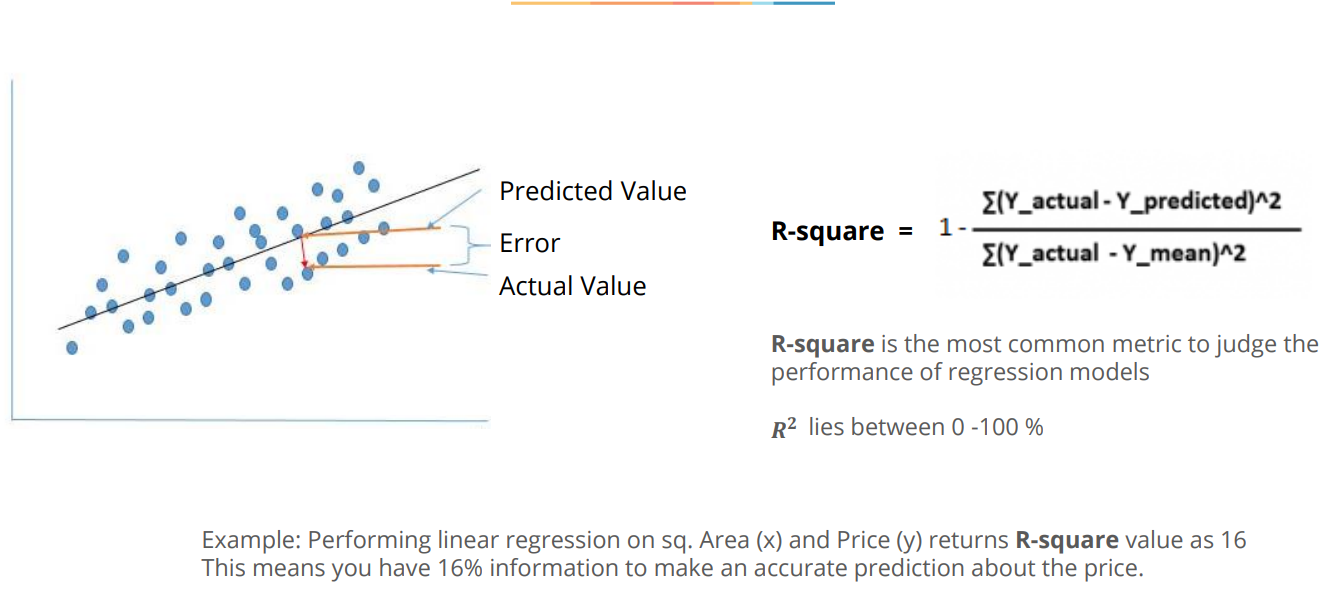

In [36]:
lm.rsquared

0.611875050850071

### now above we did for tv but now me make prediction for all to make multiple linear regression model

In [37]:
fcol=['TV','radio','newspaper']
X=df[fcol]
y=df.sales
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

The train_test_split() function is used to split the dataset into train and test sets. By default, the function shuffles the data (with shuffle=True) before splitting. The random state hyperparameter in the train_test_split() function controls the shuffling process.

With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control.

With random_state=0 , we get the same train and test sets across different executions. With random_state=42, we get the same train and test sets across different executions, but in this time, the train and test sets are different from the previous case with random_state=0 .

The train and test sets directly affect the model’s performance score. Because we get different train and test sets with different integer values for random_state in the train_test_split() function, the value of the random state hyperparameter indirectly affects the model’s performance score.


some Notes:
now we divide our dataset into train test split
now if we set test_size to 0.2 it automatically sets our train_set to 80
 while random state is used On a serious note, random_state simply sets a seed to the random generator,
so that your train-test splits are always deterministic.
If you don't set a seed, it is different each time
splitting the data in train and test is randomised you would get different data assigned to the train and
test data unless you can control for the random factor.

In [38]:
lm=LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [39]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [40]:
print(lm.intercept_)
print(lm.coef_)
pred=lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,pred)))# mean squared error

2.7089490925159083
[0.04405928 0.1992875  0.00688245]
1.9485372043446385


In [42]:
lm=smf.ols(formula='sales ~ TV + radio + newspaper',data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        10:07:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
lm=smf.ols(formula='sales ~ TV + radio ',data=df).fit()
lm.rsquared# rqured increses as we add more features to the model

0.8971942610828957

In [44]:
### till now all the features were numerical,but what if there is categorical feature

In [45]:
import numpy as np
np.random.seed(12345)
nums=np.random.rand(len(df))
masks_large=nums>0.5
df['Size']='small'
df.loc[masks_large,'Size']='large'
df.head()


,Unnamed: 0,TV,radio,newspaper,sales,Size
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


In [46]:
df.drop(['Unnamed: 0'],axis=1)

,TV,radio,newspaper,sales,Size
0,230.1,37.8,69.2,22.1,large
1,44.5,39.3,45.1,10.4,small
2,17.2,45.9,69.3,9.3,small
3,151.5,41.3,58.5,18.5,small
4,180.8,10.8,58.4,12.9,large
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,small
196,94.2,4.9,8.1,9.7,small
197,177.0,9.3,6.4,12.8,small
198,283.6,42.0,66.2,25.5,small


In [47]:
df['islarge']=df.Size.map({'small':0,'large':1})
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Size,islarge
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1


In [48]:
# converting categorical into numerical
# # our gender column is chracter variable so we have to labelcode it
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# #convert the categorical columns into numeric
# df['Gender'] = le.fit_transform(df['Gender'])
# df.head(15)

# BigMart data demo 

#### Problem statement :

BigMart has collected sales data for 1559 products across 10 stores in different 
cities. Attributes of each product and store have been defined. 





#### Objectives

Build a predictive model and find out the sales of each product at a particular store
• Using Ridge and Lasso regression techniques, interpret the coefficients of the model
• Make predictions using the model
• Evaluate model efficiency using RMSE and R-Square values

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [3]:
# import datasets
train=pd.read_csv('bigmart_train.csv')
test=pd.read_csv('bigmart_test.csv')

In [4]:
train.shape

(8523, 12)

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test.shape

(5681, 11)

In [7]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [8]:
# combine train and test into one file to perform EDA
train["source"]="train"
test["source"]="test"
data=pd.concat([train,test],ignore_index=True)
print(data.shape)

(14204, 13)


In [9]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [10]:
# remember  Item_Outlet_Sales is target variable

In [11]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
# check missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [15]:
# we will look into these missing values but at first lets print unique values in some variables
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [17]:
# outlet age
data['outlet_age']=2023-data['Outlet_Establishment_Year']
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14


In [19]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [20]:
# now coping with missing values in outlet size
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [21]:
# taking mode ( most occuring) among these
data['Outlet_Size'].mode()[0]

'Medium'

In [22]:
# filling the missing values with medium
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [24]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
outlet_age                      0
dtype: int64

In [25]:
# now dealing with missing values of item_weight and Item_outletsales
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [26]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
outlet_age                      0
dtype: int64

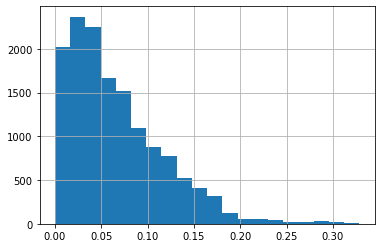

In [28]:
# plot histogram to reveal distb of item_visibilty column
data["Item_Visibility"].hist(bins=20)

In [29]:
# detecting for outlears
# outlier is a point that lies outside overall pattern in a distribution
# commn rule: data point is an  outlier if it is 1.5 IQR above third quartile or below first quartile

In [30]:
# first quartile
Q1=data['Item_Visibility'].quantile(0.25)

In [31]:
# third quantle
Q3=data['Item_Visibility'].quantile(0.75)

In [32]:
#IQR
IQR=Q3-Q1

In [33]:
# now that IQR IS known remove outliers from data
fill_data=data.query('(@Q1-1.5*@IQR)<=Item_Visibility<=(@Q3+1.5*@IQR)')

In [34]:
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14


In [35]:
fill_data.shape# with ouliers removed

(13943, 14)

In [36]:
data.shape# original shape

(14204, 14)

In [37]:
data=fill_data

In [38]:
data.shape

(13943, 14)

In [39]:
# modify item visibilty by converting numerical values to categorical
data['Item_Visibility_bins']=pd.cut(data['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['lowviz','viz','highviz'])

<ipython-input-39-8e761cf3538a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Visibility_bins']=pd.cut(data['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['lowviz','viz','highviz'])


In [40]:
data['Item_Visibility_bins'].value_counts()

lowviz     7363
viz        4283
highviz    1418
Name: Item_Visibility_bins, dtype: int64

In [41]:
# replace null values with low viz
data['Item_Visibility_bins']=data['Item_Visibility_bins'].replace(np.nan,"lowviz",regex=True)

<ipython-input-41-8bc56cc77a11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Visibility_bins']=data['Item_Visibility_bins'].replace(np.nan,"lowviz",regex=True)


In [42]:
# making changes in fat as well
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(["Low Fat","LF"],"Low Fat")

<ipython-input-42-ca2afe40a6ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Fat_Content']=data['Item_Fat_Content'].replace(["Low Fat","LF"],"Low Fat")


In [43]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(["Regular","reg"],"Regular")

<ipython-input-43-3a8f691a1701>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Fat_Content']=data['Item_Fat_Content'].replace(["Regular","reg"],"Regular")


In [44]:
# now label encodig to convert categorical into numerical variables

In [46]:
le=LabelEncoder()

In [47]:
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])

<ipython-input-47-fdfee8906dda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])


In [52]:
 data["Item_Visibility"]=le.fit_transform(data["Item_Visibility"])

<ipython-input-52-8946236bd6c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Item_Visibility"]=le.fit_transform(data["Item_Visibility"])


In [51]:
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])

<ipython-input-51-e3afecb6f4c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])


In [53]:
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])

<ipython-input-53-c85523afef67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])


In [54]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [55]:
# dummies for outlet type
dummy=pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [56]:
data['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [57]:
# as there are diff numbers for foods,nonconsumable items,drinks with diff numbers
data['Item_Identifier'].value_counts()

NCD43    10
NCX18    10
FDO15    10
FDU21    10
FDH08    10
         ..
FDA10     7
FDS22     7
FDL32     7
FDR51     7
FDP13     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [58]:
# as multiple categories are present so reduce this by mapping
data['Item_type_combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_type_combined']=data['Item_type_combined'].map({'FD':'Food',
                                                          'NC':'Non-Consumable',
                                                          'DR':'Drinks'})

<ipython-input-58-0cd660b905de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_type_combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
<ipython-input-58-0cd660b905de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_type_combined']=data['Item_type_combined'].map({'FD':'Food',


In [59]:
data['Item_type_combined'].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_type_combined, dtype: int64

In [60]:
data.shape

(13943, 16)

In [62]:
# perform one hot encoding on all columns as moddel works on numerical values and not on categorical
data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_type_combined'])

In [63]:
data.dtypes

Item_Identifier                        object
Item_Weight                           float64
Item_Visibility                         int64
Item_Type                              object
Item_MRP                              float64
Outlet_Identifier                      object
Outlet_Establishment_Year               int64
Item_Outlet_Sales                     float64
source                                 object
outlet_age                              int64
Item_Visibility_bins                 category
Item_Fat_Content_0                      uint8
Item_Fat_Content_1                      uint8
Item_Fat_Content_2                      uint8
Outlet_Location_Type_0                  uint8
Outlet_Location_Type_1                  uint8
Outlet_Location_Type_2                  uint8
Outlet_Size_0                           uint8
Outlet_Size_1                           uint8
Outlet_Size_2                           uint8
Outlet_Type_Grocery Store               uint8
Outlet_Type_Supermarket Type1     

In [64]:
# divide dataset created earlier to train and test datasets

In [67]:
train=data.loc[data["source"] == "train"]
test=data.loc[data["source"] == "test"]
# drop uneccessary columns
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
# export modified versions of files
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)



C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
train2=pd.read_csv('train_modified.csv')
test2=pd.read_csv('test_modified.csv')

In [69]:
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                        int64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
outlet_age                             int64
Item_Visibility_bins                  object
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Item_Fat_Content_2                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Typ

In [88]:
x_train=train2.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier','Item_Type','Item_Visibility_bins'],axis=1)
y_train=train2.Item_Outlet_Sales  

In [89]:
x_test=test2.drop(['Outlet_Identifier','Item_Identifier'],axis=1)


In [90]:
x_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,outlet_age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_type_combined_Drinks,Item_type_combined_Food,Item_type_combined_Non-Consumable
0,9.30,1097,249.8092,1999,24,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,5.92,1436,48.2692,2009,14,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [91]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [93]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [94]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [86]:
lin=LinearRegression()

In [95]:
lin.fit(x_train,y_train)

LinearRegression()

In [96]:
print(lin.coef_)
lin.intercept_

[-7.72225753e-01 -4.55799119e-03  1.57975737e+01  2.00662027e+01
 -2.00662027e+01 -2.90683441e+01  1.36634684e+01  1.54048757e+01
  2.40675118e+02  1.05561770e+01 -2.51231295e+02  6.10183043e+02
 -3.43137377e+02 -2.67045666e+02 -1.63289097e+03 -1.94544011e+02
 -4.31456999e+02  2.25889198e+03  2.88286628e+00  1.13978194e+01
 -1.42806857e+01]


-39204.67962140584

In [97]:
# predict test set result of trainng data
pred=lin.predict(xtest)
pred

array([2055.84952644, 3773.41682591, 2989.18868138, ..., 3505.98066167,
       3419.58825245, 1270.73906985])

In [98]:
import math
print(math.sqrt(mean_squared_error(ytest,pred)))

1122.0364467051245


In [101]:
# predict column item_outlet_sales of test dataset
y_sales_pred=lin.predict(x_test)
y_sales_pred

ValueError: could not convert string to float: 'Snack Foods'